In [5]:
import pandas as pd
from data_mountain_query.query import get_ambient_tweets
from data_mountain_query.connection import get_connection
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import timedelta
import plotly.express as px

In [6]:
games = pd.read_csv("/Users/elisabethkollrack/Thesis/EK-thesis/games.csv")
games = games[games['game_type'] == 'REG']
games['gameday'] = pd.to_datetime(games['gameday'], format='%m/%d/%y')

# Dallas 2013 games
ne_games = games[
    (games['season'] >= 2013) & (games['season'] <= 2017) &
    ((games['home_team'] == 'DEN') | (games['away_team'] == 'DEN'))
].sort_values(['season', 'gameday'])


In [7]:
collection, client = get_connection(geotweets=True)

Connecting on mgmt1.vacc.uvm.edu


In [8]:
all_tweets = []
for index, game in ne_games.iterrows():
    gameday = game['gameday']
    
    # Determine opponent
    if game['home_team'] == 'DEN':
        opponent = game['away_team']
    else:
        opponent = game['home_team']

    anchors = [
        "#denverbroncos", 
        "#broncos",
        f"#DENvs{opponent}",
        f"#{opponent}vsDEN"
    ]

    start_date = gameday - timedelta(days=3)
    end_date = gameday + timedelta(days=3)
    dates = pd.date_range(start_date, end_date, freq='D')

    for anchor in anchors:
        tweets_list1 = [t for t in get_ambient_tweets(anchor, dates, collection)]
        all_tweets.extend(tweets_list1)



{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-02 00:00:00'), '$lt': Timestamp('2013-09-08 00:00:00')}, 'fastText_lang': 'en'}


  0%|          | 0/18 [00:00<?, ?it/s]/opt/anaconda3/envs/data-mountain-query/lib/python3.9/site-packages/pymongo/synchronous/collection.py:1945: UserWarning: use an explicit session with no_cursor_timeout=True otherwise the cursor may still timeout after 30 minutes, for more info see https://mongodb.com/docs/v4.4/reference/method/cursor.noCursorTimeout/#session-idle-timeout-overrides-nocursortimeout
  return Cursor(self, *args, **kwargs)
100%|██████████| 18/18 [00:00<00:00, 45.48it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-02 00:00:00'), '$lt': Timestamp('2013-09-08 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 252/252 [00:01<00:00, 164.39it/s]


{'$text': {'$search': '"#DENvsBAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-02 00:00:00'), '$lt': Timestamp('2013-09-08 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 38/38 [00:00<00:00, 119.58it/s]


{'$text': {'$search': '"#BALvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-02 00:00:00'), '$lt': Timestamp('2013-09-08 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 131/131 [00:02<00:00, 49.19it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-12 00:00:00'), '$lt': Timestamp('2013-09-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 19.10it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-12 00:00:00'), '$lt': Timestamp('2013-09-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 78/78 [00:00<00:00, 101.76it/s]


{'$text': {'$search': '"#DENvsNYG"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-12 00:00:00'), '$lt': Timestamp('2013-09-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 44/44 [00:00<00:00, 130.86it/s]


{'$text': {'$search': '"#NYGvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-12 00:00:00'), '$lt': Timestamp('2013-09-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-20 00:00:00'), '$lt': Timestamp('2013-09-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 11/11 [00:00<00:00, 40.15it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-20 00:00:00'), '$lt': Timestamp('2013-09-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 109/109 [00:01<00:00, 102.76it/s]


{'$text': {'$search': '"#DENvsOAK"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-20 00:00:00'), '$lt': Timestamp('2013-09-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00,  6.96it/s]


{'$text': {'$search': '"#OAKvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-20 00:00:00'), '$lt': Timestamp('2013-09-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 29/29 [00:00<00:00, 182.14it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-26 00:00:00'), '$lt': Timestamp('2013-10-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00, 16.37it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-26 00:00:00'), '$lt': Timestamp('2013-10-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 84/84 [00:00<00:00, 126.92it/s]


{'$text': {'$search': '"#DENvsPHI"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-26 00:00:00'), '$lt': Timestamp('2013-10-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 10.24it/s]


{'$text': {'$search': '"#PHIvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-26 00:00:00'), '$lt': Timestamp('2013-10-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 19/19 [00:00<00:00, 66.68it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-03 00:00:00'), '$lt': Timestamp('2013-10-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00,  7.53it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-03 00:00:00'), '$lt': Timestamp('2013-10-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 187/187 [00:01<00:00, 171.36it/s]


{'$text': {'$search': '"#DENvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-03 00:00:00'), '$lt': Timestamp('2013-10-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 106/106 [00:00<00:00, 106.30it/s]


{'$text': {'$search': '"#DALvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-03 00:00:00'), '$lt': Timestamp('2013-10-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 16/16 [00:00<00:00, 59.46it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-10 00:00:00'), '$lt': Timestamp('2013-10-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 35.28it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-10 00:00:00'), '$lt': Timestamp('2013-10-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 73/73 [00:00<00:00, 128.80it/s]


{'$text': {'$search': '"#DENvsJAX"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-10 00:00:00'), '$lt': Timestamp('2013-10-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


{'$text': {'$search': '"#JAXvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-10 00:00:00'), '$lt': Timestamp('2013-10-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 22/22 [00:00<00:00, 72.51it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-17 00:00:00'), '$lt': Timestamp('2013-10-23 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 11.48it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-17 00:00:00'), '$lt': Timestamp('2013-10-23 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 125/125 [00:01<00:00, 96.69it/s]


{'$text': {'$search': '"#DENvsIND"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-17 00:00:00'), '$lt': Timestamp('2013-10-23 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 127/127 [00:01<00:00, 103.83it/s]


{'$text': {'$search': '"#INDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-17 00:00:00'), '$lt': Timestamp('2013-10-23 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 10/10 [00:00<00:00, 90.72it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-24 00:00:00'), '$lt': Timestamp('2013-10-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 32.92it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-24 00:00:00'), '$lt': Timestamp('2013-10-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 80/80 [00:00<00:00, 82.53it/s]


{'$text': {'$search': '"#DENvsWAS"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-24 00:00:00'), '$lt': Timestamp('2013-10-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 30.14it/s]


{'$text': {'$search': '"#WASvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-24 00:00:00'), '$lt': Timestamp('2013-10-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 13/13 [00:00<00:00, 42.58it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-07 00:00:00'), '$lt': Timestamp('2013-11-13 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-07 00:00:00'), '$lt': Timestamp('2013-11-13 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 49/49 [00:00<00:00, 120.66it/s]


{'$text': {'$search': '"#DENvsSD"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-07 00:00:00'), '$lt': Timestamp('2013-11-13 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 23/23 [00:00<00:00, 72.45it/s]


{'$text': {'$search': '"#SDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-07 00:00:00'), '$lt': Timestamp('2013-11-13 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-14 00:00:00'), '$lt': Timestamp('2013-11-20 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 36.30it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-14 00:00:00'), '$lt': Timestamp('2013-11-20 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 126/126 [00:01<00:00, 97.58it/s]


{'$text': {'$search': '"#DENvsKC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-14 00:00:00'), '$lt': Timestamp('2013-11-20 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 22/22 [00:00<00:00, 64.31it/s]


{'$text': {'$search': '"#KCvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-14 00:00:00'), '$lt': Timestamp('2013-11-20 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 81/81 [00:00<00:00, 114.07it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-21 00:00:00'), '$lt': Timestamp('2013-11-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 18/18 [00:00<00:00, 66.27it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-21 00:00:00'), '$lt': Timestamp('2013-11-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 256/256 [00:02<00:00, 105.22it/s]


{'$text': {'$search': '"#DENvsNE"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-21 00:00:00'), '$lt': Timestamp('2013-11-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 283/283 [00:02<00:00, 124.86it/s]


{'$text': {'$search': '"#NEvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-21 00:00:00'), '$lt': Timestamp('2013-11-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 26/26 [00:00<00:00, 96.52it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-28 00:00:00'), '$lt': Timestamp('2013-12-04 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 20/20 [00:00<00:00, 64.35it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-28 00:00:00'), '$lt': Timestamp('2013-12-04 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 153/153 [00:01<00:00, 95.52it/s]


{'$text': {'$search': '"#DENvsKC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-28 00:00:00'), '$lt': Timestamp('2013-12-04 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 120/120 [00:01<00:00, 95.92it/s]


{'$text': {'$search': '"#KCvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-28 00:00:00'), '$lt': Timestamp('2013-12-04 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 30.84it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-05 00:00:00'), '$lt': Timestamp('2013-12-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 26.81it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-05 00:00:00'), '$lt': Timestamp('2013-12-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 106/106 [00:01<00:00, 79.96it/s]


{'$text': {'$search': '"#DENvsTEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-05 00:00:00'), '$lt': Timestamp('2013-12-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 30.06it/s]


{'$text': {'$search': '"#TENvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-05 00:00:00'), '$lt': Timestamp('2013-12-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 28/28 [00:00<00:00, 45.22it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-09 00:00:00'), '$lt': Timestamp('2013-12-15 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 8/8 [00:00<00:00, 30.04it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-09 00:00:00'), '$lt': Timestamp('2013-12-15 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 129/129 [00:01<00:00, 105.59it/s]


{'$text': {'$search': '"#DENvsSD"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-09 00:00:00'), '$lt': Timestamp('2013-12-15 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 16/16 [00:00<00:00, 57.53it/s]


{'$text': {'$search': '"#SDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-09 00:00:00'), '$lt': Timestamp('2013-12-15 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 108/108 [00:01<00:00, 86.88it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-19 00:00:00'), '$lt': Timestamp('2013-12-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 8/8 [00:00<00:00, 25.36it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-19 00:00:00'), '$lt': Timestamp('2013-12-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 93/93 [00:00<00:00, 97.59it/s]


{'$text': {'$search': '"#DENvsHOU"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-19 00:00:00'), '$lt': Timestamp('2013-12-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 26/26 [00:00<00:00, 83.19it/s]


{'$text': {'$search': '"#HOUvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-19 00:00:00'), '$lt': Timestamp('2013-12-25 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-26 00:00:00'), '$lt': Timestamp('2014-01-01 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 16.37it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-26 00:00:00'), '$lt': Timestamp('2014-01-01 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 68/68 [00:00<00:00, 94.75it/s]


{'$text': {'$search': '"#DENvsOAK"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-26 00:00:00'), '$lt': Timestamp('2014-01-01 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 24/24 [00:00<00:00, 77.96it/s]


{'$text': {'$search': '"#OAKvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-26 00:00:00'), '$lt': Timestamp('2014-01-01 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-04 00:00:00'), '$lt': Timestamp('2014-09-10 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 12/12 [00:00<00:00, 42.32it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-04 00:00:00'), '$lt': Timestamp('2014-09-10 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 204/204 [00:01<00:00, 139.74it/s]


{'$text': {'$search': '"#DENvsIND"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-04 00:00:00'), '$lt': Timestamp('2014-09-10 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 39/39 [00:00<00:00, 130.93it/s]


{'$text': {'$search': '"#INDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-04 00:00:00'), '$lt': Timestamp('2014-09-10 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 124/124 [00:00<00:00, 146.58it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-11 00:00:00'), '$lt': Timestamp('2014-09-17 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 7/7 [00:00<00:00, 23.41it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-11 00:00:00'), '$lt': Timestamp('2014-09-17 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 67/67 [00:00<00:00, 109.25it/s]


{'$text': {'$search': '"#DENvsKC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-11 00:00:00'), '$lt': Timestamp('2014-09-17 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 16/16 [00:00<00:00, 66.76it/s]


{'$text': {'$search': '"#KCvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-11 00:00:00'), '$lt': Timestamp('2014-09-17 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 61/61 [00:00<00:00, 114.89it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-18 00:00:00'), '$lt': Timestamp('2014-09-24 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 12/12 [00:00<00:00, 43.93it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-18 00:00:00'), '$lt': Timestamp('2014-09-24 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 101/101 [00:00<00:00, 151.84it/s]


{'$text': {'$search': '"#DENvsSEA"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-18 00:00:00'), '$lt': Timestamp('2014-09-24 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 162/162 [00:00<00:00, 189.98it/s]


{'$text': {'$search': '"#SEAvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-09-18 00:00:00'), '$lt': Timestamp('2014-09-24 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 66/66 [00:00<00:00, 212.37it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-02 00:00:00'), '$lt': Timestamp('2014-10-08 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 10/10 [00:00<00:00, 33.27it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-02 00:00:00'), '$lt': Timestamp('2014-10-08 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 71/71 [00:00<00:00, 205.68it/s]


{'$text': {'$search': '"#DENvsARI"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-02 00:00:00'), '$lt': Timestamp('2014-10-08 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#ARIvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-02 00:00:00'), '$lt': Timestamp('2014-10-08 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00, 15.61it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-09 00:00:00'), '$lt': Timestamp('2014-10-15 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00,  9.59it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-09 00:00:00'), '$lt': Timestamp('2014-10-15 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 63/63 [00:00<00:00, 154.17it/s]


{'$text': {'$search': '"#DENvsNYJ"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-09 00:00:00'), '$lt': Timestamp('2014-10-15 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 41/41 [00:00<00:00, 135.30it/s]


{'$text': {'$search': '"#NYJvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-09 00:00:00'), '$lt': Timestamp('2014-10-15 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00,  6.28it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-16 00:00:00'), '$lt': Timestamp('2014-10-22 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 15/15 [00:00<00:00, 50.87it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-16 00:00:00'), '$lt': Timestamp('2014-10-22 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 109/109 [00:01<00:00, 105.46it/s]


{'$text': {'$search': '"#DENvsSF"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-16 00:00:00'), '$lt': Timestamp('2014-10-22 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 8/8 [00:00<00:00, 25.52it/s]


{'$text': {'$search': '"#SFvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-16 00:00:00'), '$lt': Timestamp('2014-10-22 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 59/59 [00:01<00:00, 45.92it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-20 00:00:00'), '$lt': Timestamp('2014-10-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 24/24 [00:00<00:00, 81.27it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-20 00:00:00'), '$lt': Timestamp('2014-10-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 163/163 [00:01<00:00, 106.94it/s]


{'$text': {'$search': '"#DENvsSD"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-20 00:00:00'), '$lt': Timestamp('2014-10-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 11.68it/s]


{'$text': {'$search': '"#SDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-20 00:00:00'), '$lt': Timestamp('2014-10-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 59/59 [00:00<00:00, 98.25it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-30 00:00:00'), '$lt': Timestamp('2014-11-05 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 7/7 [00:00<00:00, 19.95it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-30 00:00:00'), '$lt': Timestamp('2014-11-05 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 87/87 [00:00<00:00, 92.32it/s]


{'$text': {'$search': '"#DENvsNE"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-30 00:00:00'), '$lt': Timestamp('2014-11-05 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 127/127 [00:01<00:00, 109.62it/s]


{'$text': {'$search': '"#NEvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-10-30 00:00:00'), '$lt': Timestamp('2014-11-05 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 33/33 [00:00<00:00, 54.13it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-06 00:00:00'), '$lt': Timestamp('2014-11-12 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00,  6.20it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-06 00:00:00'), '$lt': Timestamp('2014-11-12 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 52/52 [00:00<00:00, 122.45it/s]


{'$text': {'$search': '"#DENvsOAK"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-06 00:00:00'), '$lt': Timestamp('2014-11-12 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 27/27 [00:00<00:00, 143.24it/s]


{'$text': {'$search': '"#OAKvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-06 00:00:00'), '$lt': Timestamp('2014-11-12 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 64.41it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-13 00:00:00'), '$lt': Timestamp('2014-11-19 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00,  6.83it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-13 00:00:00'), '$lt': Timestamp('2014-11-19 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 51/51 [00:00<00:00, 139.67it/s]


{'$text': {'$search': '"#DENvsSTL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-13 00:00:00'), '$lt': Timestamp('2014-11-19 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 29/29 [00:00<00:00, 119.18it/s]


{'$text': {'$search': '"#STLvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-13 00:00:00'), '$lt': Timestamp('2014-11-19 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-20 00:00:00'), '$lt': Timestamp('2014-11-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 13.48it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-20 00:00:00'), '$lt': Timestamp('2014-11-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 74/74 [00:00<00:00, 116.80it/s]


{'$text': {'$search': '"#DENvsMIA"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-20 00:00:00'), '$lt': Timestamp('2014-11-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 16/16 [00:00<00:00, 64.51it/s]


{'$text': {'$search': '"#MIAvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-20 00:00:00'), '$lt': Timestamp('2014-11-26 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 59/59 [00:00<00:00, 522.85it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-27 00:00:00'), '$lt': Timestamp('2014-12-03 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 7/7 [00:00<00:00, 30.23it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-27 00:00:00'), '$lt': Timestamp('2014-12-03 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 55/55 [00:00<00:00, 171.85it/s]


{'$text': {'$search': '"#DENvsKC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-27 00:00:00'), '$lt': Timestamp('2014-12-03 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 43/43 [00:00<00:00, 132.27it/s]


{'$text': {'$search': '"#KCvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-11-27 00:00:00'), '$lt': Timestamp('2014-12-03 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 11.23it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-04 00:00:00'), '$lt': Timestamp('2014-12-10 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 14.35it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-04 00:00:00'), '$lt': Timestamp('2014-12-10 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 40/40 [00:00<00:00, 229.64it/s]


{'$text': {'$search': '"#DENvsBUF"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-04 00:00:00'), '$lt': Timestamp('2014-12-10 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 26.37it/s]


{'$text': {'$search': '"#BUFvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-04 00:00:00'), '$lt': Timestamp('2014-12-10 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 20/20 [00:00<00:00, 63.56it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-11 00:00:00'), '$lt': Timestamp('2014-12-17 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 11.16it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-11 00:00:00'), '$lt': Timestamp('2014-12-17 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 47/47 [00:00<00:00, 130.62it/s]


{'$text': {'$search': '"#DENvsSD"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-11 00:00:00'), '$lt': Timestamp('2014-12-17 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 34/34 [00:00<00:00, 121.25it/s]


{'$text': {'$search': '"#SDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-11 00:00:00'), '$lt': Timestamp('2014-12-17 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 15.72it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-19 00:00:00'), '$lt': Timestamp('2014-12-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 13.87it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-19 00:00:00'), '$lt': Timestamp('2014-12-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 81/81 [00:00<00:00, 107.54it/s]


{'$text': {'$search': '"#DENvsCIN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-19 00:00:00'), '$lt': Timestamp('2014-12-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 93/93 [00:00<00:00, 159.51it/s]


{'$text': {'$search': '"#CINvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-19 00:00:00'), '$lt': Timestamp('2014-12-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 20/20 [00:00<00:00, 73.81it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-25 00:00:00'), '$lt': Timestamp('2014-12-31 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 11/11 [00:00<00:00, 37.09it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-25 00:00:00'), '$lt': Timestamp('2014-12-31 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 48/48 [00:00<00:00, 115.82it/s]


{'$text': {'$search': '"#DENvsOAK"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-25 00:00:00'), '$lt': Timestamp('2014-12-31 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 12/12 [00:00<00:00, 36.11it/s]


{'$text': {'$search': '"#OAKvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2014-12-25 00:00:00'), '$lt': Timestamp('2014-12-31 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 20/20 [00:00<00:00, 74.22it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-10 00:00:00'), '$lt': Timestamp('2015-09-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 13.69it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-10 00:00:00'), '$lt': Timestamp('2015-09-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 15/15 [00:00<00:00, 46.17it/s]


{'$text': {'$search': '"#DENvsBAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-10 00:00:00'), '$lt': Timestamp('2015-09-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


{'$text': {'$search': '"#BALvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-10 00:00:00'), '$lt': Timestamp('2015-09-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 7/7 [00:00<00:00, 17.54it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-14 00:00:00'), '$lt': Timestamp('2015-09-20 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00,  9.28it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-14 00:00:00'), '$lt': Timestamp('2015-09-20 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 15/15 [00:00<00:00, 39.58it/s]


{'$text': {'$search': '"#DENvsKC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-14 00:00:00'), '$lt': Timestamp('2015-09-20 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 14/14 [00:00<00:00, 142.27it/s]


{'$text': {'$search': '"#KCvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-14 00:00:00'), '$lt': Timestamp('2015-09-20 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 20.44it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-24 00:00:00'), '$lt': Timestamp('2015-09-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.15it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-24 00:00:00'), '$lt': Timestamp('2015-09-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 53.77it/s]


{'$text': {'$search': '"#DENvsDET"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-24 00:00:00'), '$lt': Timestamp('2015-09-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 7/7 [00:00<00:00, 75.11it/s]


{'$text': {'$search': '"#DETvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-09-24 00:00:00'), '$lt': Timestamp('2015-09-30 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-01 00:00:00'), '$lt': Timestamp('2015-10-07 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-01 00:00:00'), '$lt': Timestamp('2015-10-07 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 7/7 [00:00<00:00, 42.82it/s]


{'$text': {'$search': '"#DENvsMIN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-01 00:00:00'), '$lt': Timestamp('2015-10-07 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#MINvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-01 00:00:00'), '$lt': Timestamp('2015-10-07 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00, 52.91it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-08 00:00:00'), '$lt': Timestamp('2015-10-14 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 20.83it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-08 00:00:00'), '$lt': Timestamp('2015-10-14 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 7/7 [00:00<00:00, 43.58it/s]


{'$text': {'$search': '"#DENvsOAK"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-08 00:00:00'), '$lt': Timestamp('2015-10-14 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 30.76it/s]


{'$text': {'$search': '"#OAKvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-08 00:00:00'), '$lt': Timestamp('2015-10-14 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-15 00:00:00'), '$lt': Timestamp('2015-10-21 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 31.59it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-15 00:00:00'), '$lt': Timestamp('2015-10-21 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 12/12 [00:00<00:00, 74.03it/s]


{'$text': {'$search': '"#DENvsCLE"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-15 00:00:00'), '$lt': Timestamp('2015-10-21 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 42.48it/s]


{'$text': {'$search': '"#CLEvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-15 00:00:00'), '$lt': Timestamp('2015-10-21 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.74it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-29 00:00:00'), '$lt': Timestamp('2015-11-04 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 37.57it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-29 00:00:00'), '$lt': Timestamp('2015-11-04 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 18/18 [00:00<00:00, 104.82it/s]


{'$text': {'$search': '"#DENvsGB"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-29 00:00:00'), '$lt': Timestamp('2015-11-04 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 21.20it/s]


{'$text': {'$search': '"#GBvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-10-29 00:00:00'), '$lt': Timestamp('2015-11-04 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 95.31it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-05 00:00:00'), '$lt': Timestamp('2015-11-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.69it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-05 00:00:00'), '$lt': Timestamp('2015-11-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 12.24it/s]


{'$text': {'$search': '"#DENvsIND"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-05 00:00:00'), '$lt': Timestamp('2015-11-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.87it/s]


{'$text': {'$search': '"#INDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-05 00:00:00'), '$lt': Timestamp('2015-11-11 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-12 00:00:00'), '$lt': Timestamp('2015-11-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 21.01it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-12 00:00:00'), '$lt': Timestamp('2015-11-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 36.93it/s]


{'$text': {'$search': '"#DENvsKC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-12 00:00:00'), '$lt': Timestamp('2015-11-18 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#KCvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-12 00:00:00'), '$lt': Timestamp('2015-11-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 11.07it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-19 00:00:00'), '$lt': Timestamp('2015-11-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.64it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-19 00:00:00'), '$lt': Timestamp('2015-11-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 15.46it/s]


{'$text': {'$search': '"#DENvsCHI"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-19 00:00:00'), '$lt': Timestamp('2015-11-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 31.63it/s]


{'$text': {'$search': '"#CHIvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-19 00:00:00'), '$lt': Timestamp('2015-11-25 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-26 00:00:00'), '$lt': Timestamp('2015-12-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 42.30it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-26 00:00:00'), '$lt': Timestamp('2015-12-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 19/19 [00:00<00:00, 110.48it/s]


{'$text': {'$search': '"#DENvsNE"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-26 00:00:00'), '$lt': Timestamp('2015-12-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 41.26it/s]


{'$text': {'$search': '"#NEvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-11-26 00:00:00'), '$lt': Timestamp('2015-12-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 26/26 [00:00<00:00, 272.30it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-03 00:00:00'), '$lt': Timestamp('2015-12-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 20.11it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-03 00:00:00'), '$lt': Timestamp('2015-12-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 18.36it/s]


{'$text': {'$search': '"#DENvsSD"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-03 00:00:00'), '$lt': Timestamp('2015-12-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.74it/s]


{'$text': {'$search': '"#SDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-03 00:00:00'), '$lt': Timestamp('2015-12-09 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-10 00:00:00'), '$lt': Timestamp('2015-12-16 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-10 00:00:00'), '$lt': Timestamp('2015-12-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 12.40it/s]


{'$text': {'$search': '"#DENvsOAK"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-10 00:00:00'), '$lt': Timestamp('2015-12-16 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#OAKvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-10 00:00:00'), '$lt': Timestamp('2015-12-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-17 00:00:00'), '$lt': Timestamp('2015-12-23 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 32.10it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-17 00:00:00'), '$lt': Timestamp('2015-12-23 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 10/10 [00:00<00:00, 60.81it/s]


{'$text': {'$search': '"#DENvsPIT"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-17 00:00:00'), '$lt': Timestamp('2015-12-23 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 21.68it/s]


{'$text': {'$search': '"#PITvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-17 00:00:00'), '$lt': Timestamp('2015-12-23 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-25 00:00:00'), '$lt': Timestamp('2015-12-31 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 20.18it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-25 00:00:00'), '$lt': Timestamp('2015-12-31 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 12/12 [00:00<00:00, 71.80it/s]


{'$text': {'$search': '"#DENvsCIN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-25 00:00:00'), '$lt': Timestamp('2015-12-31 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.44it/s]


{'$text': {'$search': '"#CINvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-25 00:00:00'), '$lt': Timestamp('2015-12-31 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 8/8 [00:00<00:00, 86.16it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-31 00:00:00'), '$lt': Timestamp('2016-01-06 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-31 00:00:00'), '$lt': Timestamp('2016-01-06 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00, 31.54it/s]


{'$text': {'$search': '"#DENvsSD"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-31 00:00:00'), '$lt': Timestamp('2016-01-06 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#SDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2015-12-31 00:00:00'), '$lt': Timestamp('2016-01-06 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-05 00:00:00'), '$lt': Timestamp('2016-09-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 41.23it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-05 00:00:00'), '$lt': Timestamp('2016-09-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 18/18 [00:00<00:00, 110.21it/s]


{'$text': {'$search': '"#DENvsCAR"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-05 00:00:00'), '$lt': Timestamp('2016-09-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.89it/s]


{'$text': {'$search': '"#CARvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-05 00:00:00'), '$lt': Timestamp('2016-09-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 92.00it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-15 00:00:00'), '$lt': Timestamp('2016-09-21 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 19.08it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-15 00:00:00'), '$lt': Timestamp('2016-09-21 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 11/11 [00:00<00:00, 68.28it/s]


{'$text': {'$search': '"#DENvsIND"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-15 00:00:00'), '$lt': Timestamp('2016-09-21 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#INDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-15 00:00:00'), '$lt': Timestamp('2016-09-21 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 31.52it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-22 00:00:00'), '$lt': Timestamp('2016-09-28 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-22 00:00:00'), '$lt': Timestamp('2016-09-28 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 18.96it/s]


{'$text': {'$search': '"#DENvsCIN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-22 00:00:00'), '$lt': Timestamp('2016-09-28 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#CINvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-22 00:00:00'), '$lt': Timestamp('2016-09-28 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-29 00:00:00'), '$lt': Timestamp('2016-10-05 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 18.69it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-29 00:00:00'), '$lt': Timestamp('2016-10-05 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 18.91it/s]


{'$text': {'$search': '"#DENvsTB"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-29 00:00:00'), '$lt': Timestamp('2016-10-05 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 20.73it/s]


{'$text': {'$search': '"#TBvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-09-29 00:00:00'), '$lt': Timestamp('2016-10-05 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-06 00:00:00'), '$lt': Timestamp('2016-10-12 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.15it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-06 00:00:00'), '$lt': Timestamp('2016-10-12 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 36.60it/s]


{'$text': {'$search': '"#DENvsATL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-06 00:00:00'), '$lt': Timestamp('2016-10-12 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#ATLvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-06 00:00:00'), '$lt': Timestamp('2016-10-12 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 21.01it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-10 00:00:00'), '$lt': Timestamp('2016-10-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 31.45it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-10 00:00:00'), '$lt': Timestamp('2016-10-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 12.20it/s]


{'$text': {'$search': '"#DENvsSD"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-10 00:00:00'), '$lt': Timestamp('2016-10-16 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#SDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-10 00:00:00'), '$lt': Timestamp('2016-10-16 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-21 00:00:00'), '$lt': Timestamp('2016-10-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00,  9.69it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-21 00:00:00'), '$lt': Timestamp('2016-10-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 18.91it/s]


{'$text': {'$search': '"#DENvsHOU"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-21 00:00:00'), '$lt': Timestamp('2016-10-27 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#HOUvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-21 00:00:00'), '$lt': Timestamp('2016-10-27 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-27 00:00:00'), '$lt': Timestamp('2016-11-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 31.76it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-27 00:00:00'), '$lt': Timestamp('2016-11-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 11/11 [00:00<00:00, 67.18it/s]


{'$text': {'$search': '"#DENvsSD"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-27 00:00:00'), '$lt': Timestamp('2016-11-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.99it/s]


{'$text': {'$search': '"#SDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-10-27 00:00:00'), '$lt': Timestamp('2016-11-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 21.94it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-03 00:00:00'), '$lt': Timestamp('2016-11-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.75it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-03 00:00:00'), '$lt': Timestamp('2016-11-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 7/7 [00:00<00:00, 38.92it/s]


{'$text': {'$search': '"#DENvsOAK"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-03 00:00:00'), '$lt': Timestamp('2016-11-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 61.67it/s]


{'$text': {'$search': '"#OAKvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-03 00:00:00'), '$lt': Timestamp('2016-11-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.71it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-10 00:00:00'), '$lt': Timestamp('2016-11-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.50it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-10 00:00:00'), '$lt': Timestamp('2016-11-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00, 30.40it/s]


{'$text': {'$search': '"#DENvsNO"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-10 00:00:00'), '$lt': Timestamp('2016-11-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 8/8 [00:00<00:00, 86.20it/s]


{'$text': {'$search': '"#NOvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-10 00:00:00'), '$lt': Timestamp('2016-11-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.93it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-24 00:00:00'), '$lt': Timestamp('2016-11-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.72it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-24 00:00:00'), '$lt': Timestamp('2016-11-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00, 31.23it/s]


{'$text': {'$search': '"#DENvsKC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-24 00:00:00'), '$lt': Timestamp('2016-11-30 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#KCvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-11-24 00:00:00'), '$lt': Timestamp('2016-11-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 95.22it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-01 00:00:00'), '$lt': Timestamp('2016-12-07 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.68it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-01 00:00:00'), '$lt': Timestamp('2016-12-07 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 17.38it/s]


{'$text': {'$search': '"#DENvsJAX"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-01 00:00:00'), '$lt': Timestamp('2016-12-07 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#JAXvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-01 00:00:00'), '$lt': Timestamp('2016-12-07 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-08 00:00:00'), '$lt': Timestamp('2016-12-14 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-08 00:00:00'), '$lt': Timestamp('2016-12-14 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 12.55it/s]


{'$text': {'$search': '"#DENvsTEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-08 00:00:00'), '$lt': Timestamp('2016-12-14 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#TENvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-08 00:00:00'), '$lt': Timestamp('2016-12-14 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-15 00:00:00'), '$lt': Timestamp('2016-12-21 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.63it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-15 00:00:00'), '$lt': Timestamp('2016-12-21 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 36.68it/s]


{'$text': {'$search': '"#DENvsNE"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-15 00:00:00'), '$lt': Timestamp('2016-12-21 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#NEvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-15 00:00:00'), '$lt': Timestamp('2016-12-21 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 30.68it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-22 00:00:00'), '$lt': Timestamp('2016-12-28 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00,  9.79it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-22 00:00:00'), '$lt': Timestamp('2016-12-28 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


{'$text': {'$search': '"#DENvsKC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-22 00:00:00'), '$lt': Timestamp('2016-12-28 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 8/8 [00:00<00:00, 80.94it/s]


{'$text': {'$search': '"#KCvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-22 00:00:00'), '$lt': Timestamp('2016-12-28 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-29 00:00:00'), '$lt': Timestamp('2017-01-04 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-29 00:00:00'), '$lt': Timestamp('2017-01-04 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#DENvsOAK"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-29 00:00:00'), '$lt': Timestamp('2017-01-04 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#OAKvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2016-12-29 00:00:00'), '$lt': Timestamp('2017-01-04 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-08 00:00:00'), '$lt': Timestamp('2017-09-14 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.31it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-08 00:00:00'), '$lt': Timestamp('2017-09-14 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 36.57it/s]


{'$text': {'$search': '"#DENvsLAC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-08 00:00:00'), '$lt': Timestamp('2017-09-14 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#LACvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-08 00:00:00'), '$lt': Timestamp('2017-09-14 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 17/17 [00:00<00:00, 184.90it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-14 00:00:00'), '$lt': Timestamp('2017-09-20 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 20.09it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-14 00:00:00'), '$lt': Timestamp('2017-09-20 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 34.30it/s]


{'$text': {'$search': '"#DENvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-14 00:00:00'), '$lt': Timestamp('2017-09-20 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#DALvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-14 00:00:00'), '$lt': Timestamp('2017-09-20 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 8/8 [00:00<00:00, 82.71it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-21 00:00:00'), '$lt': Timestamp('2017-09-27 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-21 00:00:00'), '$lt': Timestamp('2017-09-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


{'$text': {'$search': '"#DENvsBUF"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-21 00:00:00'), '$lt': Timestamp('2017-09-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 29.23it/s]


{'$text': {'$search': '"#BUFvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-21 00:00:00'), '$lt': Timestamp('2017-09-27 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-28 00:00:00'), '$lt': Timestamp('2017-10-04 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 1/1 [00:00<00:00, 10.95it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-28 00:00:00'), '$lt': Timestamp('2017-10-04 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 37.13it/s]


{'$text': {'$search': '"#DENvsOAK"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-28 00:00:00'), '$lt': Timestamp('2017-10-04 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#OAKvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-09-28 00:00:00'), '$lt': Timestamp('2017-10-04 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00, 52.16it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-12 00:00:00'), '$lt': Timestamp('2017-10-18 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-12 00:00:00'), '$lt': Timestamp('2017-10-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00, 30.88it/s]


{'$text': {'$search': '"#DENvsNYG"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-12 00:00:00'), '$lt': Timestamp('2017-10-18 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#NYGvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-12 00:00:00'), '$lt': Timestamp('2017-10-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 11/11 [00:00<00:00, 114.99it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-19 00:00:00'), '$lt': Timestamp('2017-10-25 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-19 00:00:00'), '$lt': Timestamp('2017-10-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 18.63it/s]


{'$text': {'$search': '"#DENvsLAC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-19 00:00:00'), '$lt': Timestamp('2017-10-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00, 53.70it/s]


{'$text': {'$search': '"#LACvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-19 00:00:00'), '$lt': Timestamp('2017-10-25 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-27 00:00:00'), '$lt': Timestamp('2017-11-02 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-27 00:00:00'), '$lt': Timestamp('2017-11-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 12.64it/s]


{'$text': {'$search': '"#DENvsKC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-27 00:00:00'), '$lt': Timestamp('2017-11-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 42.57it/s]


{'$text': {'$search': '"#KCvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-10-27 00:00:00'), '$lt': Timestamp('2017-11-02 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-02 00:00:00'), '$lt': Timestamp('2017-11-08 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-02 00:00:00'), '$lt': Timestamp('2017-11-08 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 12.55it/s]


{'$text': {'$search': '"#DENvsPHI"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-02 00:00:00'), '$lt': Timestamp('2017-11-08 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 33.11it/s]


{'$text': {'$search': '"#PHIvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-02 00:00:00'), '$lt': Timestamp('2017-11-08 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-09 00:00:00'), '$lt': Timestamp('2017-11-15 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-09 00:00:00'), '$lt': Timestamp('2017-11-15 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 24.91it/s]


{'$text': {'$search': '"#DENvsNE"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-09 00:00:00'), '$lt': Timestamp('2017-11-15 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#NEvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-09 00:00:00'), '$lt': Timestamp('2017-11-15 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 20.98it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-16 00:00:00'), '$lt': Timestamp('2017-11-22 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 16.86it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-16 00:00:00'), '$lt': Timestamp('2017-11-22 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 7/7 [00:00<00:00, 43.27it/s]


{'$text': {'$search': '"#DENvsCIN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-16 00:00:00'), '$lt': Timestamp('2017-11-22 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#CINvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-16 00:00:00'), '$lt': Timestamp('2017-11-22 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-23 00:00:00'), '$lt': Timestamp('2017-11-29 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-23 00:00:00'), '$lt': Timestamp('2017-11-29 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 18.76it/s]


{'$text': {'$search': '"#DENvsOAK"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-23 00:00:00'), '$lt': Timestamp('2017-11-29 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#OAKvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-23 00:00:00'), '$lt': Timestamp('2017-11-29 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-30 00:00:00'), '$lt': Timestamp('2017-12-06 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-30 00:00:00'), '$lt': Timestamp('2017-12-06 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 18.92it/s]


{'$text': {'$search': '"#DENvsMIA"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-30 00:00:00'), '$lt': Timestamp('2017-12-06 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#MIAvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-11-30 00:00:00'), '$lt': Timestamp('2017-12-06 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-07 00:00:00'), '$lt': Timestamp('2017-12-13 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-07 00:00:00'), '$lt': Timestamp('2017-12-13 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#DENvsNYJ"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-07 00:00:00'), '$lt': Timestamp('2017-12-13 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#NYJvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-07 00:00:00'), '$lt': Timestamp('2017-12-13 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-11 00:00:00'), '$lt': Timestamp('2017-12-17 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-11 00:00:00'), '$lt': Timestamp('2017-12-17 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#DENvsIND"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-11 00:00:00'), '$lt': Timestamp('2017-12-17 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#INDvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-11 00:00:00'), '$lt': Timestamp('2017-12-17 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-21 00:00:00'), '$lt': Timestamp('2017-12-27 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-21 00:00:00'), '$lt': Timestamp('2017-12-27 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#DENvsWAS"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-21 00:00:00'), '$lt': Timestamp('2017-12-27 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#WASvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-21 00:00:00'), '$lt': Timestamp('2017-12-27 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#denverbroncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-28 00:00:00'), '$lt': Timestamp('2018-01-03 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 20.63it/s]


{'$text': {'$search': '"#broncos"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-28 00:00:00'), '$lt': Timestamp('2018-01-03 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 18.80it/s]


{'$text': {'$search': '"#DENvsKC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-28 00:00:00'), '$lt': Timestamp('2018-01-03 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#KCvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2017-12-28 00:00:00'), '$lt': Timestamp('2018-01-03 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


In [9]:
geo_df = pd.DataFrame(all_tweets)

# Extract lon and lat from the 'geo' column
geo_df['lon'] = geo_df['geo'].apply(lambda x: x['coordinates'][0] if isinstance(x, dict) else None)
geo_df['lat'] = geo_df['geo'].apply(lambda x: x['coordinates'][1] if isinstance(x, dict) else None)

geo_df.head()

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,twitter_entities,twitter_filter_level,twitter_lang,retweetCount,gnip,twitter_extended_entities,long_object,inReplyTo,lon,lat
0,5e447adff765e1127af54f72,Fri Sep 06 00:19:27 +0000 2013,375775216107925500,375775216107925504,orange and blue! let's go broncos! #milehighma...,"<a href=""http://itunes.apple.com/us/app/instag...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.408183,31.432173
1,5e447b38f765e1127af61c11,Fri Sep 06 01:14:17 +0000 2013,375789015384854500,375789015384854528,So happy to be back in Colorado to root for my...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-105.278508,40.012486
2,5e447deff765e1127afb4b64,Fri Sep 06 04:15:30 +0000 2013,375834619968376800,375834619968376832,Dumbass. #DenverBroncos 😂😂😂😂,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.392848,33.987324
3,5e447be6f765e1127af75c8f,Fri Sep 06 02:23:52 +0000 2013,375806526226964500,375806526226964480,Thomas = sleeper #DenverBroncos,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.151269,40.435936
4,5e447dcef765e1127afb175b,Fri Sep 06 04:06:52 +0000 2013,375832447406964740,375832447406964736,Ahhhhhhh BLOW OUT #DenverBroncos,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-106.464705,31.806958


In [10]:
cities = gpd.read_file("/Users/elisabethkollrack/Thesis/EK-Thesis/tl_2024_us_cbsa/tl_2024_us_cbsa.shp")

tweets_gdf = gpd.GeoDataFrame(
    geo_df, 
    geometry=gpd.points_from_xy(geo_df.lon, geo_df.lat),
    crs="EPSG:4326"
)

# Spatial join of tweets inside metros
tweets_with_city = gpd.sjoin(
    tweets_gdf,
    cities,
    how='left',
    predicate='within'
)

# Keep only major metropolitan statistical areas (M1)
tweets_with_city = tweets_with_city[tweets_with_city["LSAD"] == "M1"]

tweets_with_city['NAME'].value_counts()


/var/folders/cg/kg987wfn3_977vnx3pkwqg0m0000gn/T/ipykernel_5184/1156845772.py:10: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  tweets_with_city = gpd.sjoin(


NAME
Denver-Aurora-Centennial, CO                    1023
New York-Newark-Jersey City, NY-NJ               266
Los Angeles-Long Beach-Anaheim, CA               256
Washington-Arlington-Alexandria, DC-VA-MD-WV     156
Dallas-Fort Worth-Arlington, TX                  146
                                                ... 
Bay City, MI                                       1
Santa Fe, NM                                       1
Athens-Clarke County, GA                           1
Peoria, IL                                         1
Redding, CA                                        1
Name: count, Length: 327, dtype: int64

/var/folders/cg/kg987wfn3_977vnx3pkwqg0m0000gn/T/ipykernel_5184/992186434.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tweets_proj


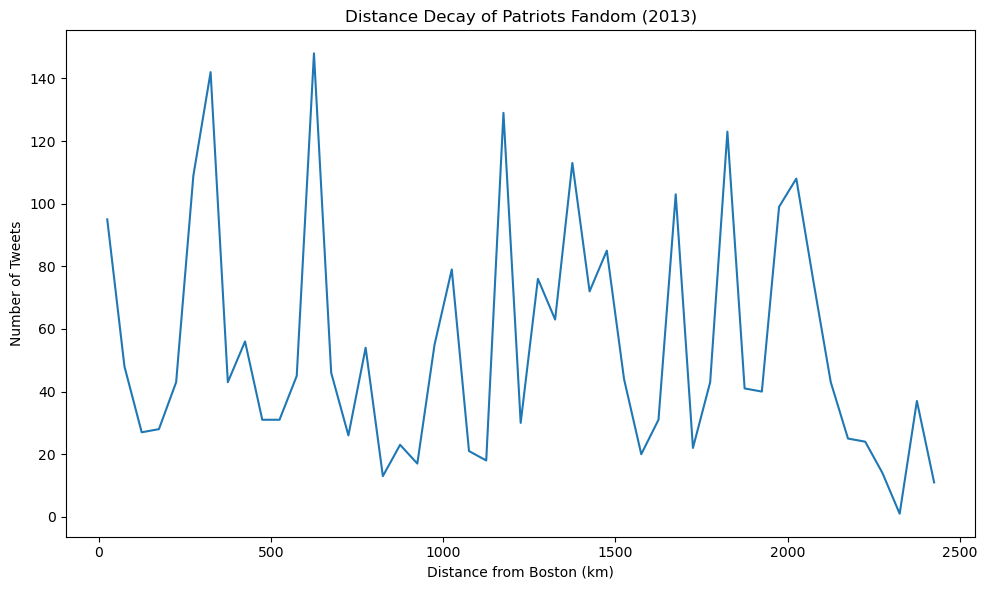

In [11]:
# radius of fandom
from shapely import Point

boston_center = Point(-71.0589, 42.3601)

# project tweets to meters
tweets_proj = tweets_with_city.to_crs(epsg=5070)  # NAD83 / Conus Albers

boston_proj = gpd.GeoSeries(
    [boston_center],
    crs="EPSG:4326"
).to_crs(epsg=5070).iloc[0]

tweets_proj["distance_km"] = (
    tweets_proj.geometry.distance(boston_proj) / 1000
)

bins = np.arange(0, 2500, 50)  # 0–2500 km in 50 km bins
tweets_proj["distance_bin"] = pd.cut(
    tweets_proj["distance_km"], bins=bins
)

distance_counts = (
    tweets_proj
    .groupby("distance_bin")
    .size()
    .reset_index(name="tweet_count")
)

# Get bin midpoints for plotting
distance_counts["bin_mid_km"] = (
    distance_counts["distance_bin"]
    .apply(lambda x: x.mid)
    .astype(float)
)


plt.figure(figsize=(10,6))
plt.plot(
    distance_counts["bin_mid_km"],
    distance_counts["tweet_count"]
)
plt.xlabel("Distance from Boston (km)")
plt.ylabel("Number of Tweets")
plt.title("Distance Decay of Patriots Fandom (2013)")
plt.show()



In [12]:
background_threshold = 1500

baseline = distance_counts[
    distance_counts["bin_mid_km"] > 1500
]["tweet_count"].mean()

radius_bg = distance_counts[
    distance_counts["tweet_count"] <= baseline
]["bin_mid_km"].iloc[0]

radius_bg

np.float64(125.0)

In [14]:
# Boston center (lat, lon)
boston_lat = 39.7392
boston_lon = -104.9903


R_km = radius_bg  # background-adjusted fandom radius

def geodesic_circle(lat, lon, radius_km, n_points=360):
    earth_radius_km = 6371.0
    angles = np.linspace(0, 2*np.pi, n_points)

    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)

    circle_lats = np.arcsin(
        np.sin(lat_rad) * np.cos(radius_km / earth_radius_km) +
        np.cos(lat_rad) * np.sin(radius_km / earth_radius_km) * np.cos(angles)
    )

    circle_lons = lon_rad + np.arctan2(
        np.sin(angles) * np.sin(radius_km / earth_radius_km) * np.cos(lat_rad),
        np.cos(radius_km / earth_radius_km) -
        np.sin(lat_rad) * np.sin(circle_lats)
    )

    return np.degrees(circle_lats), np.degrees(circle_lons)


circle_lat, circle_lon = geodesic_circle(
    boston_lat, boston_lon, R_km
)
metro_summary = tweets_with_city.groupby('NAME').agg({
    'id': 'count',
    'lat': 'mean',
    'lon': 'mean'
}).reset_index()

metro_summary = metro_summary.rename(columns={'id': 'count'})
metro_summary = metro_summary[metro_summary['count'] >= 10]

fig = px.scatter_geo(
    metro_summary,
    lat="lat",
    lon="lon",
    size="count",
    hover_name="NAME",
    hover_data={"count": True, "lat": False, "lon": False},
    title="Geographic Radius of Patriots Cowboys Fandom",
    scope="usa"
)


fig.add_trace(
    px.line_geo(
        lat=circle_lat,
        lon=circle_lon
    ).data[0]
)

fig.data[-1].update(
    line=dict(width=3, dash="dash"),
    name=f"Fandom radius ≈ {int(R_km)} km",
    showlegend=True
)

fig.add_trace(
    px.scatter_geo(
        lat=[boston_lat],
        lon=[boston_lon]
    ).data[0]
)

fig.data[-1].update(
    marker=dict(size=12),
    name="Boston"
)

fig.update_geos(
    scope="usa",
    showland=True,
    landcolor="lightgray",
    showocean=True,
    oceancolor="azure",
    showlakes=True,
    lakecolor="azure",
    showrivers=True,
    rivercolor="azure"
)

fig.update_layout(
    title_x=0.5,
    title_font_size=20,
    geo=dict(
        bgcolor='rgba(0,0,0,0)',
        landcolor='lightgray',
        lakecolor='azure'
    )
)

fig.show()

